# Sentiment Analysis on Tweet Data

This notebook performs sentiment analysis on tweet data using various machine learning models. We'll go through the following steps:

1. Load and explore the data
2. Data preprocessing
3. Split the data into training and testing sets
4. Text vectorization using TF-IDF
5. Combine TF-IDF features with metadata
6. Model training and evaluation
7. Save the best model
8. Visualize the results


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import hstack
import pickle  # Or import joblib

## 1. Load and Explore the Data

In [2]:
# Load the dataset
df = pd.read_csv('label_data.csv')

# Display the first few rows of the dataframe
df.head()

C:\Users\umang\AppData\Local\Temp\ipykernel_19028\274489767.py:2: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('label_data.csv')


Unnamed: 0                       Date  \
0          0  2023-04-08 03:33:13+00:00   
1          1  2023-04-08 03:32:16+00:00   
2          2  2023-04-08 03:32:05+00:00   
3          3  2023-04-08 03:31:08+00:00   
4          4  2023-04-08 03:30:51+00:00   

                                               Tweet  \
0  #ChatGPT If only there were a movie or somethi...   
1  Workshop Description: In this workshop, you wi...   
2  New Post at AiNewsDrop!\n\nChatGPT is a doctor...   
3  OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
4  "Classical art" is struggling - not changed th...   

                                                 Url           User  \
0  https://twitter.com/kirbydjohnson/status/16445...  kirbydjohnson   
1  https://twitter.com/UniversityWeb/status/16445...  UniversityWeb   
2  https://twitter.com/AiNewsDrop/status/16445436...     AiNewsDrop   
3  https://twitter.com/tubeblogger/status/1644543...    tubeblogger   
4  https://twitter.com/majorradic/status/16445432...     majorradic   

                 UserCreated UserVerified  UserFollowers  UserFriends  \
0  2012-07-29 22:57:46+00:00        False           50.0         76.0   
1  2013-01-13 20:18:16+00:00        False         9056.0        387.0   
2  2022-01-19 06:25:45+00:00        False          276.0        313.0   
3  2013-06-25 01:42:59+00:00        False          312.0        293.0   
4  2011-12-12 01:29:15+00:00        False          522.0        684.0   

  Retweets Likes         Location  \
0      0.0     0              NaN   
1      0.0     0              NaN   
2      0.0     0              NaN   
3      0.0     0     The Internet   
4      0.0     2  Beograd Navodni   

                                         Description Sentiment     Score  
0                                                NaN  negative  0.998189  
1  University webinars, speech videos, & news for...  positive  0.549544  
2  I'm up almost 24/7 hunting for AI News\n\nWith...  negative  0.996630  
3  Exploring the Best Of The Web. Tech, Games, Ar...  negative  0.997521  
4  Mediji i milosrdje\n\n                        ...  negative  0.989594

In [3]:
# Drop the unnecessary columns
df = df.drop(columns='Unnamed: 0')

# Display the first few rows after dropping the column
df.head()

Date  \
0  2023-04-08 03:33:13+00:00   
1  2023-04-08 03:32:16+00:00   
2  2023-04-08 03:32:05+00:00   
3  2023-04-08 03:31:08+00:00   
4  2023-04-08 03:30:51+00:00   

                                               Tweet  \
0  #ChatGPT If only there were a movie or somethi...   
1  Workshop Description: In this workshop, you wi...   
2  New Post at AiNewsDrop!\n\nChatGPT is a doctor...   
3  OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
4  "Classical art" is struggling - not changed th...   

                                                 Url           User  \
0  https://twitter.com/kirbydjohnson/status/16445...  kirbydjohnson   
1  https://twitter.com/UniversityWeb/status/16445...  UniversityWeb   
2  https://twitter.com/AiNewsDrop/status/16445436...     AiNewsDrop   
3  https://twitter.com/tubeblogger/status/1644543...    tubeblogger   
4  https://twitter.com/majorradic/status/16445432...     majorradic   

                 UserCreated UserVerified  UserFollowers  UserFriends  \
0  2012-07-29 22:57:46+00:00        False           50.0         76.0   
1  2013-01-13 20:18:16+00:00        False         9056.0        387.0   
2  2022-01-19 06:25:45+00:00        False          276.0        313.0   
3  2013-06-25 01:42:59+00:00        False          312.0        293.0   
4  2011-12-12 01:29:15+00:00        False          522.0        684.0   

  Retweets Likes         Location  \
0      0.0     0              NaN   
1      0.0     0              NaN   
2      0.0     0              NaN   
3      0.0     0     The Internet   
4      0.0     2  Beograd Navodni   

                                         Description Sentiment     Score  
0                                                NaN  negative  0.998189  
1  University webinars, speech videos, & news for...  positive  0.549544  
2  I'm up almost 24/7 hunting for AI News\n\nWith...  negative  0.996630  
3  Exploring the Best Of The Web. Tech, Games, Ar...  negative  0.997521  
4  Mediji i milosrdje\n\n                        ...  negative  0.989594

In [6]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478347 entries, 0 to 478346
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           478266 non-null  object 
 1   Tweet          478295 non-null  object 
 2   Url            478266 non-null  object 
 3   User           478266 non-null  object 
 4   UserCreated    478237 non-null  object 
 5   UserVerified   478237 non-null  object 
 6   UserFollowers  478266 non-null  float64
 7   UserFriends    478266 non-null  float64
 8   Retweets       478240 non-null  object 
 9   Likes          478266 non-null  object 
 10  Location       358836 non-null  object 
 11  Description    455383 non-null  object 
 12  Sentiment      478347 non-null  object 
 13  Score          478347 non-null  float64
dtypes: float64(3), object(11)
memory usage: 51.1+ MB


In [5]:
# Display statistical summary of the dataframe
df.describe()

UserFollowers   UserFriends          Score
count   4.782660e+05  4.782660e+05  478347.000000
mean    1.994619e+04  2.169194e+03       0.963727
std     3.228404e+05  1.255664e+04       0.085379
min     0.000000e+00  0.000000e+00       0.500003
25%     7.500000e+01  1.100000e+02       0.981290
50%     4.400000e+02  4.330000e+02       0.994846
75%     2.159000e+03  1.376000e+03       0.998079
max     1.773959e+07  1.168327e+06       0.999883

### Data Visualization
Let's visualize some basic statistics about the data.

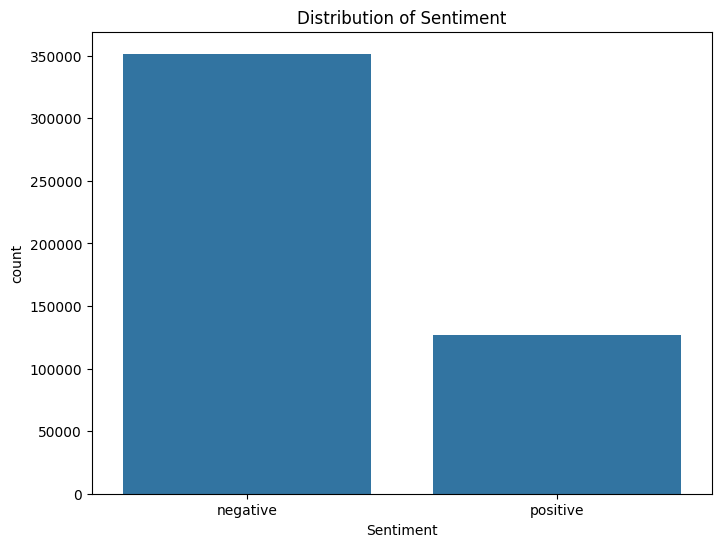

In [6]:
# Visualize the distribution of the target variable 'Sentiment'
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.show()

## 2. Data Preprocessing


In [6]:
# Fill missing values with empty strings
df.fillna('', inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
df['UserVerified'] = df['UserVerified'].astype(str)
df['UserVerified'] = label_encoder.fit_transform(df['UserVerified'])

# Convert UserFollowerCount to numeric and handle possible empty strings
df['UserFollowers'] = pd.to_numeric(df['UserFollowers'], errors='coerce').fillna(0)
df['UserFriends'] = pd.to_numeric(df['UserFriends'], errors='coerce').fillna(0)
df['Retweets'] = pd.to_numeric(df['Retweets'], errors='coerce').fillna(0)
df['Likes'] = pd.to_numeric(df['Likes'], errors='coerce').fillna(0)

# Encode the target variable
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

## 3. Split the Data into Training and Testing Sets

In [9]:
""" import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Function to apply clean_text function in batches and print progress
def apply_in_batches(df, func, batch_size=10):
    results = []
    num_batches = (len(df) // batch_size) + 1

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(df))
        batch_df = df.iloc[start_idx:end_idx]
        batch_result = batch_df.apply(func)
        results.extend(batch_result)
        print(f"Processed {end_idx} out of {len(df)}")

    return results

# Apply the function to the tweet column and create a new column
df['cleaned_tweet'] = apply_in_batches(df['Tweet'], clean_text)

# Split the data into features and target variable
X = df['cleaned_tweet']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) """

' import string\nimport re\nimport nltk\nfrom nltk.tokenize import word_tokenize\nfrom nltk.corpus import stopwords\nfrom sklearn.model_selection import train_test_split\n\n# Download NLTK data (if not already downloaded)\nnltk.download(\'punkt\')\nnltk.download(\'stopwords\')\n\n# Function to clean text\ndef clean_text(text):\n    emoji_pattern = re.compile("["\n                           u"😀-🙏"  # emoticons\n                           u"🌀-🗿"  # symbols & pictographs\n                           u"🚀-\U0001f6ff"  # transport & map symbols\n                           u"🜀-\U0001f77f"  # alchemical symbols\n                           u"🞀-\U0001f7ff"  # Geometric Shapes Extended\n                           u"🠀-\U0001f8ff"  # Supplemental Arrows-C\n                           u"🤀-🧿"  # Supplemental Symbols and Pictographs\n                           u"🨀-\U0001fa6f"  # Chess Symbols\n                           u"🩰-\U0001faff"  # Symbols and Pictographs Extended-A\n                           u"

In [7]:
import string
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Download NLTK data (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Function to apply clean_text function in batches and print progress
def apply_in_batches(df, func, batch_size=10):
    results = []
    num_batches = (len(df) // batch_size) + 1

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(df))
        batch_df = df.iloc[start_idx:end_idx]
        batch_result = batch_df.apply(func)
        results.extend(batch_result)
        print(f"Processed {end_idx} out of {len(df)}")

    return results

# Apply the function to the tweet column and create a new column
df['cleaned_tweet'] = apply_in_batches(df['Tweet'], clean_text)

# Split the data into features and target variable
X = df['cleaned_tweet']
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\umang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\umang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed 10 out of 478347
Processed 20 out of 478347
Processed 30 out of 478347
Processed 40 out of 478347
Processed 50 out of 478347
Processed 60 out of 478347
Processed 70 out of 478347
Processed 80 out of 478347
Processed 90 out of 478347
Processed 100 out of 478347
Processed 110 out of 478347
Processed 120 out of 478347
Processed 130 out of 478347
Processed 140 out of 478347
Processed 150 out of 478347
Processed 160 out of 478347
Processed 170 out of 478347
Processed 180 out of 478347
Processed 190 out of 478347
Processed 200 out of 478347
Processed 210 out of 478347
Processed 220 out of 478347
Processed 230 out of 478347
Processed 240 out of 478347
Processed 250 out of 478347
Processed 260 out of 478347
Processed 270 out of 478347
Processed 280 out of 478347
Processed 290 out of 478347
Processed 300 out of 478347
Processed 310 out of 478347
Processed 320 out of 478347
Processed 330 out of 478347
Processed 340 out of 478347
Processed 350 out of 478347
Processed 360 out of 478347
P

## Text Vectorization using TF-IDF

In [9]:
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the TF-IDF features
X_train_tfidf.shape, X_test_tfidf.shape

((382677, 3000), (95670, 3000))

# Applying LDA for topic Modelling

In [10]:
from gensim.corpora.dictionary import Dictionary
from gensim.matutils import Sparse2Corpus
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.matutils import Sparse2Corpus
from sklearn.feature_extraction.text import TfidfVectorizer

Topic 1: ['ai', 'chatgpt', 'language', 'technology', 'openai', 'new', 'content', 'learn', 'use', 'amp']
Topic 2: ['chatgpt', 'ai', 'write', 'asked', 'like', 'poem', 'human', 'people', 'openai', 'humans']
Topic 3: ['chatgpt', 'openai', 'ai', 'elonmusk', 'asked', 'know', 'im', 'ask', 'good', 'think']
Topic 4: ['ai', 'chatgpt', 'google', 'openai', 'bard', 'artificialintelligence', 'gpt', 'gpt4', 'chat', 'midjourney']
Topic 5: ['chatgpt', 'ai', 'education', 'students', 'use', 'using', 'edtech', 'teachers', 'learning', 'teaching']
Topic 6: ['bing', 'microsoft', 'chatgpt', 'ai', 'search', 'openai', 'google', 'engine', 'italy', 'data']
Topic 7: ['chatgpt', 'nft', 'crypto', 'bitcoin', 'airdrop', 'eth', 'ai', 'btc', 'trading', 'trending']
Topic 8: ['ai', 'chatgpt', 'machinelearning', 'python', 'artificialintelligence', 'metaverse', 'deeplearning', 'tech', 'web3', 'ml']
Topic 9: ['chatgpt', 'openai', 'ai', 'answer', 'bias', 'wrong', 'correct', 'plus', 'question', 'like']
Topic 10: ['chatgpt', 'o

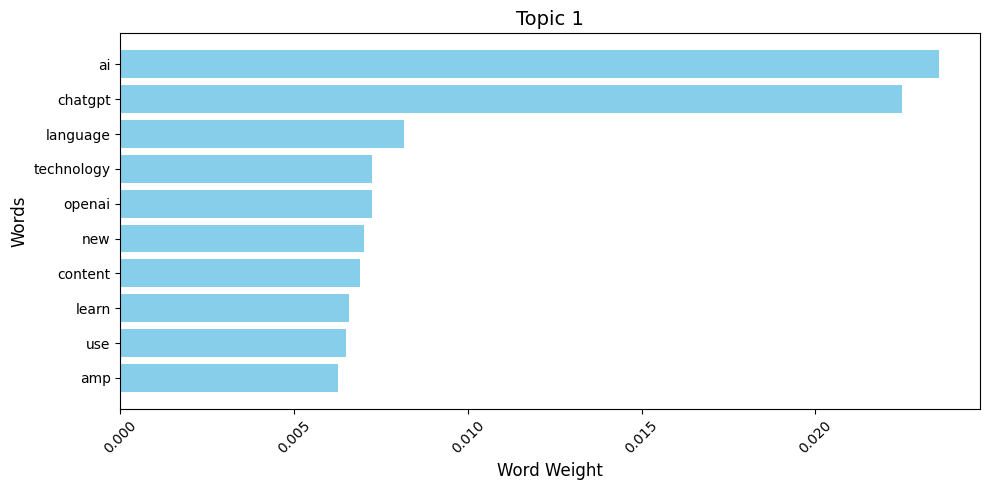

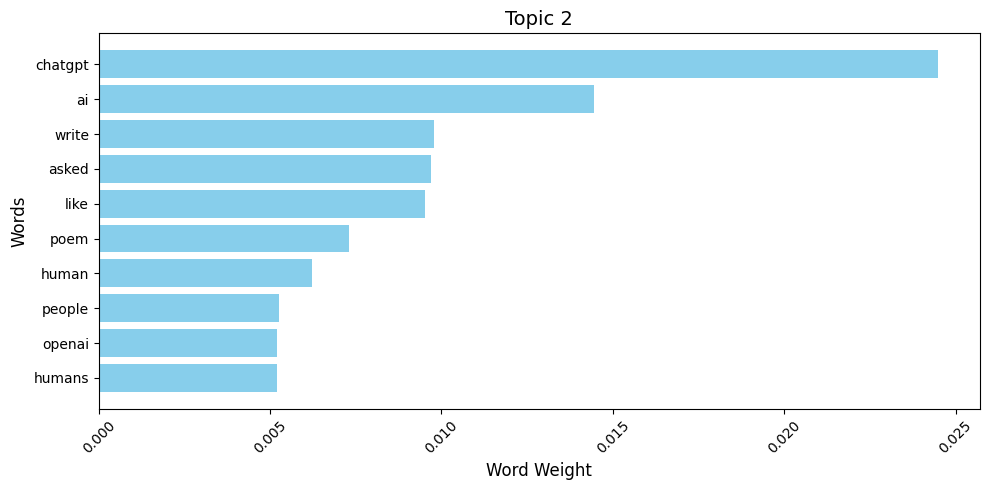

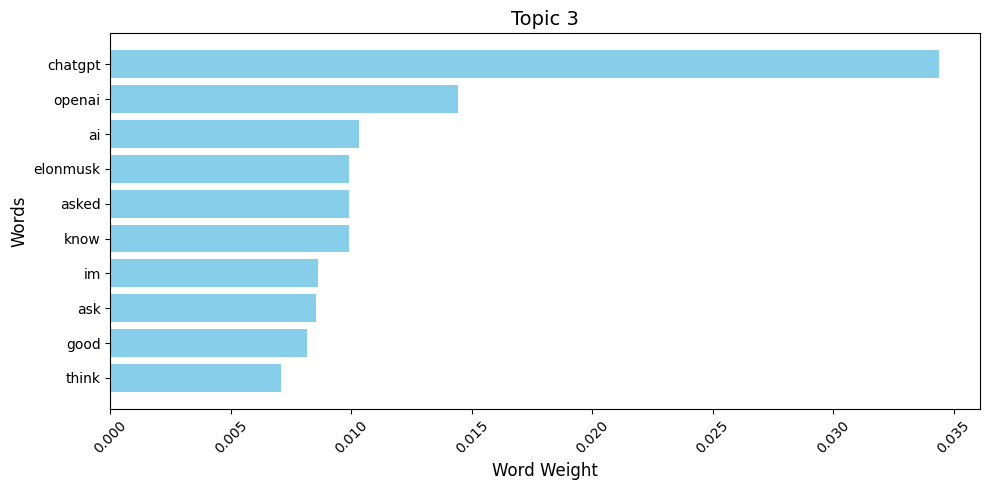

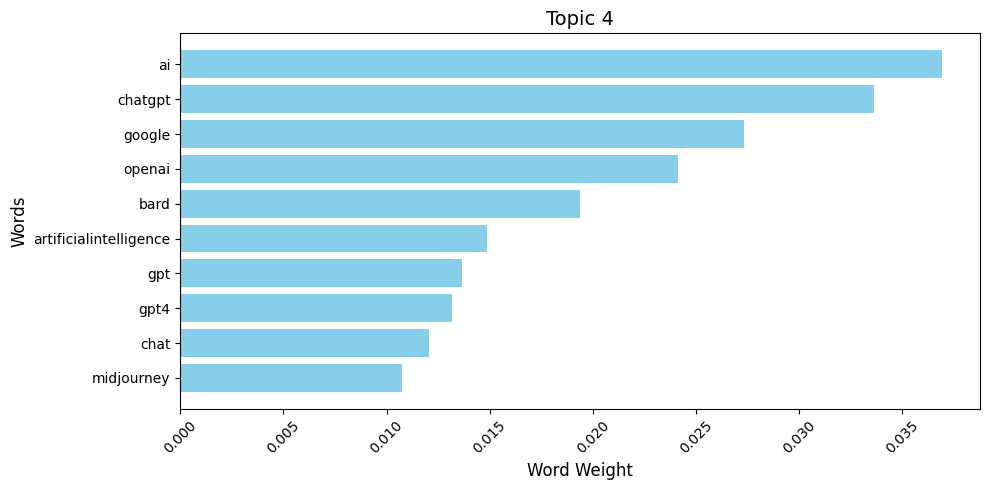

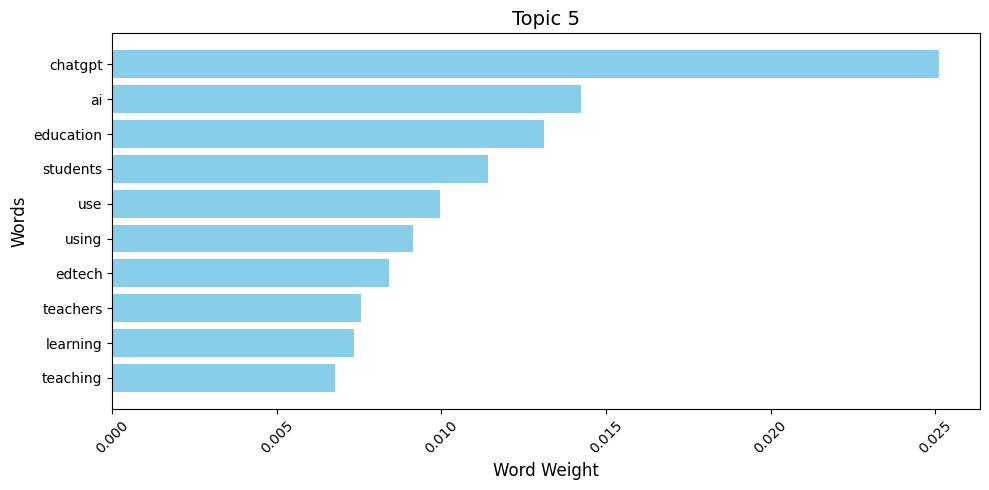

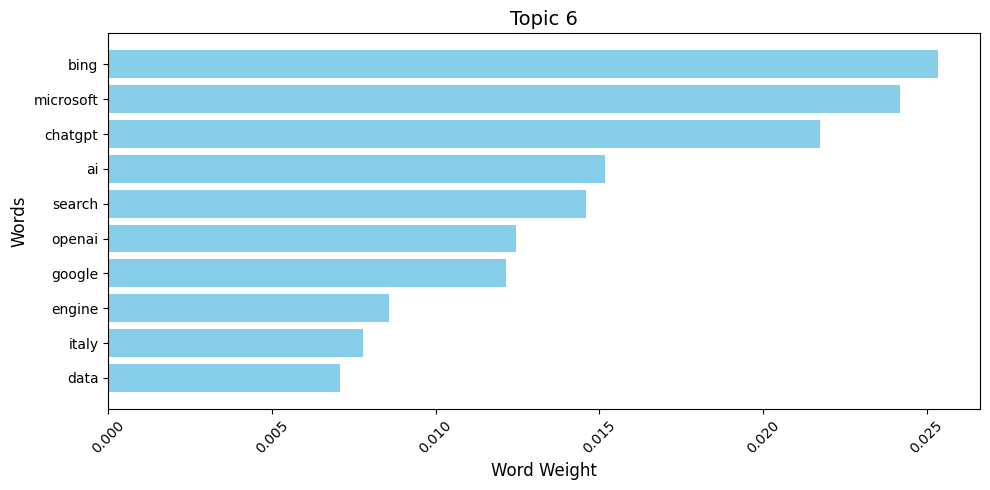

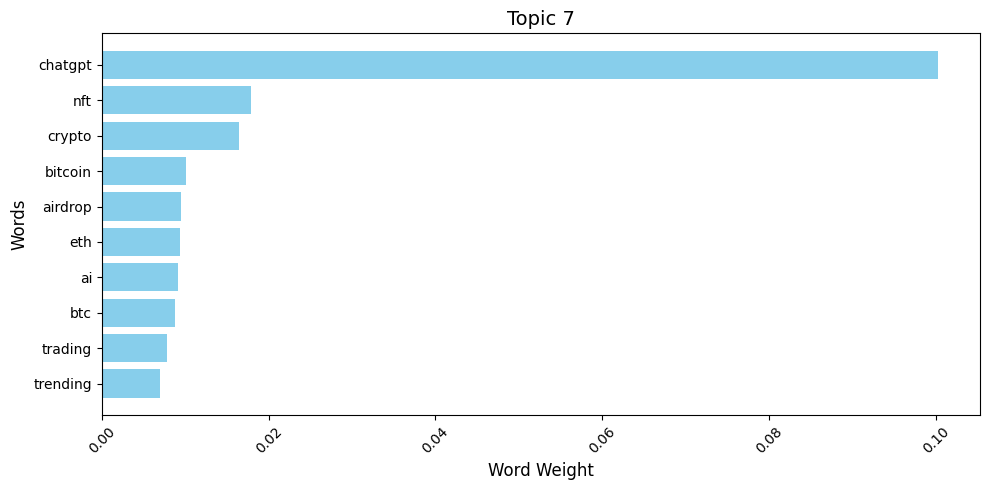

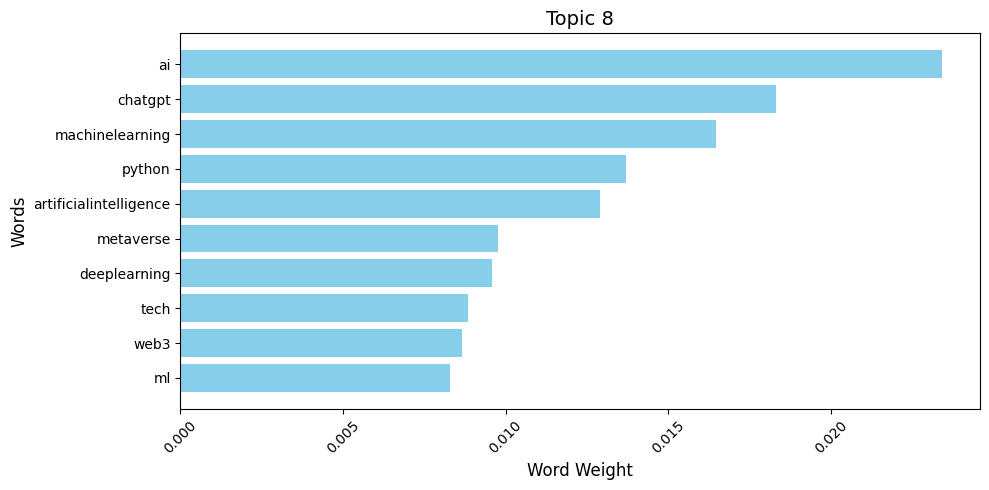

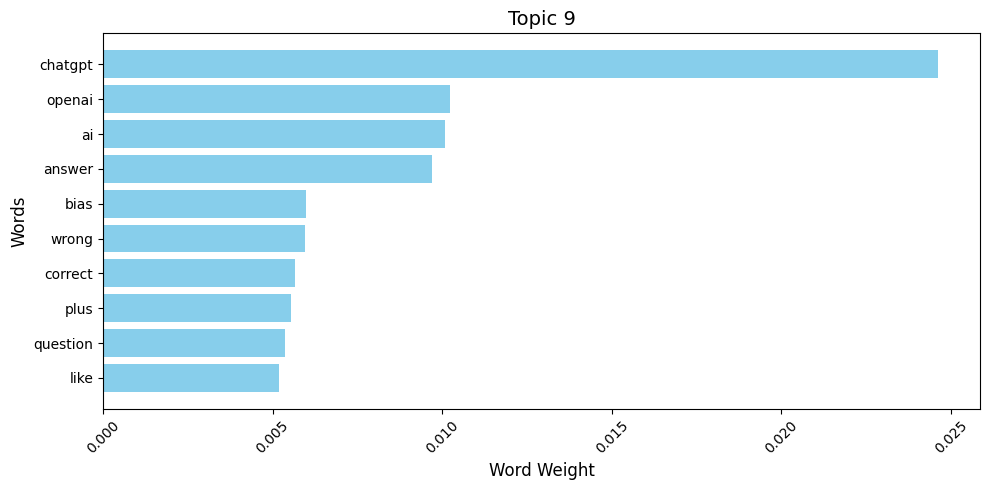

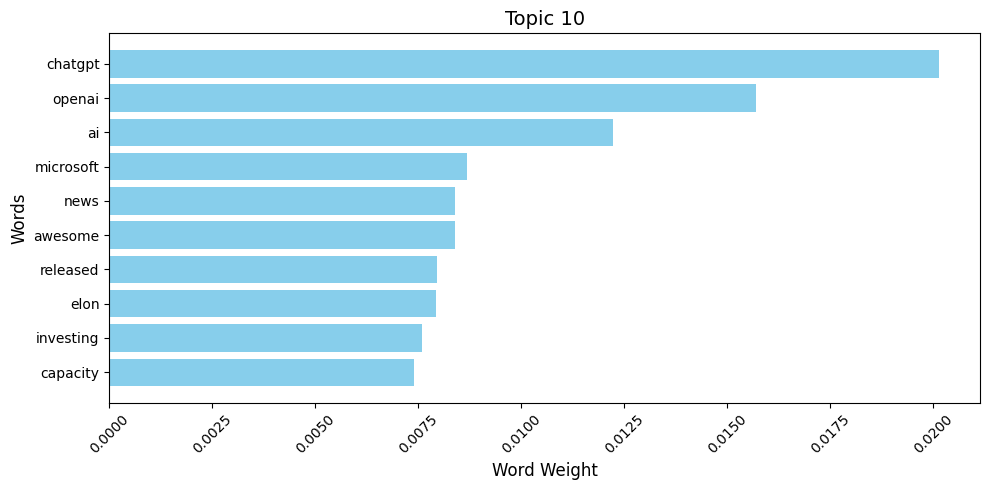

In [11]:
# Convert the TF-IDF matrix to gensim corpus format
corpus_train = Sparse2Corpus(X_train_tfidf.transpose())
id2word = Dictionary.from_corpus(corpus_train, id2word=dict((id, word) for word, id in tfidf_vectorizer.vocabulary_.items()))

# Train LDA model
num_topics = 10  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus_train, id2word=id2word, num_topics=num_topics, random_state=42)

# Display topics
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id + 1}: {[word for word, _ in topic_words]}")

# Step 5: Visualize LDA topics with separate bar plots
for i in range(num_topics):
    # Create a new figure for each topic
    plt.figure(figsize=(10, 5))
    topic_words = dict(lda_model.show_topic(i, 10))
    plt.barh(list(topic_words.keys()), list(topic_words.values()), color='skyblue')
    plt.title(f'Topic {i + 1}', fontsize=14)
    plt.xlabel('Word Weight', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important word at the top
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Topic based on sentiments

Sentiment              0         1
dominant_topic                    
0               0.745452  0.254548
1               0.728901  0.271099
2               0.731791  0.268209
3               0.737973  0.262027
4               0.729418  0.270582
5               0.742539  0.257461
6               0.737507  0.262493
7               0.750018  0.249982
8               0.730083  0.269917
9               0.732100  0.267900


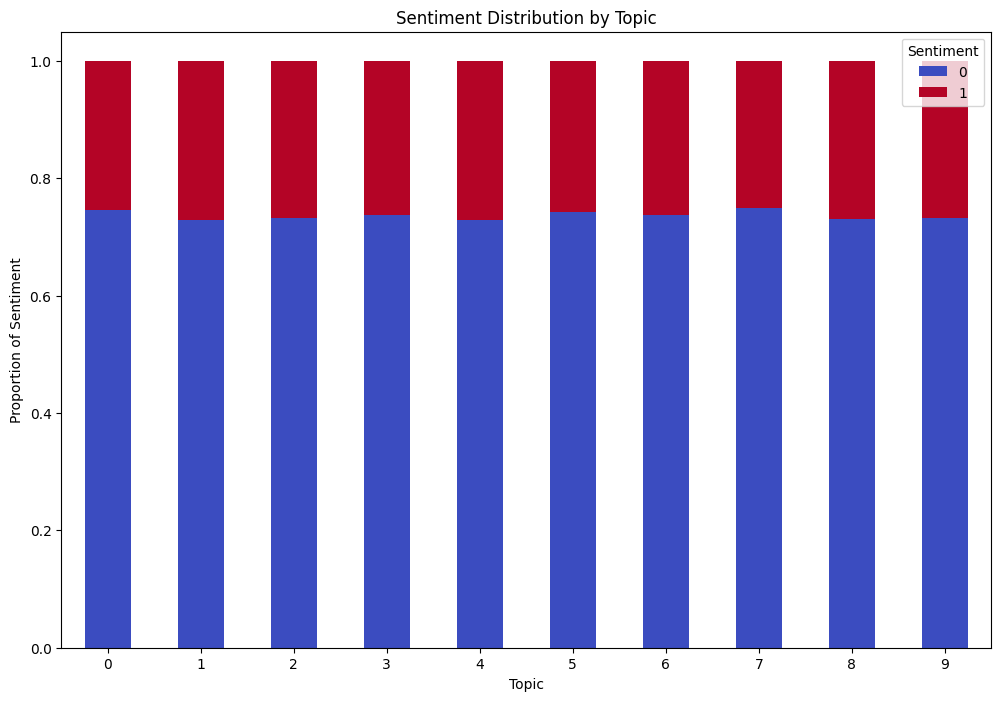

In [15]:
# Assign dominant topic to each tweet
def get_dominant_topic(lda_model, bow):
    topic_probs = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
    return dominant_topic

# Convert tweets to bag-of-words format
bow_corpus = [id2word.doc2bow(tweet.split()) for tweet in df['cleaned_tweet']]
df['dominant_topic'] = [get_dominant_topic(lda_model, bow) for bow in bow_corpus]

# Aggregate sentiment by dominant topic
topic_sentiment = df.groupby('dominant_topic')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
print(topic_sentiment)

# Plot sentiment distribution for each topic
fig, ax = plt.subplots(figsize=(12, 8))
topic_sentiment.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm')
ax.set_xlabel('Topic')
ax.set_ylabel('Proportion of Sentiment')
ax.set_title('Sentiment Distribution by Topic')
ax.legend(title='Sentiment')
plt.xticks(rotation=0)
plt.show()

## Save the TfidfVectorizer

In [12]:
# Save the TfidfVectorizer to a file
def save_vectorizer(vectorizer, filename):
    """Saves a fitted TfidfVectorizer to a file.

    Args:
        vectorizer: The fitted TfidfVectorizer object.
        filename: The path to the file where the vectorizer will be saved.
    """
    with open(filename, 'wb') as f:
        pickle.dump(vectorizer, f)  # Or joblib.dump(vectorizer, f) for Joblib

# Save the TfidfVectorizer
save_vectorizer(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

## Combine TF-IDF Features with Metadata

In [17]:
# Select additional features
metadata_features = ['UserVerified', 'UserFollowers', 'UserFriends', 'Retweets', 'Likes']
X_train_metadata = df.loc[X_train.index, metadata_features]
X_test_metadata = df.loc[X_test.index, metadata_features]

# Combine TF-IDF features with metadata
X_train_combined = hstack([X_train_tfidf, X_train_metadata])
X_test_combined = hstack([X_test_tfidf, X_test_metadata])

# Extraction of bert Embedings

In [18]:
from transformers import BertTokenizer, BertModel
import torch

# Extract the text column
texts = df['cleaned_tweet'].tolist()

C:\Users\kehin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
#parallelized version

from transformers import DistilBertTokenizer, DistilBertModel
import torch
import numpy as np
from concurrent.futures import ThreadPoolExecutor, as_completed

# Check if GPU is available and set device accordingly
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

# Load pre-trained DistilBERT model and tokenizer
print("Loading pre-trained DistilBERT model and tokenizer...")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
print("Model and tokenizer loaded successfully.")

print(f"Using first {len(texts)} texts.")

# Function to process a batch of texts
def process_batch(batch_texts):
    encoded_batch = tokenizer(batch_texts, padding=True, truncation=True, return_tensors='pt', max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**encoded_batch)
        embeddings = outputs.last_hidden_state
        # Convert 3D tensor to 2D by averaging over the sequence length dimension
        embeddings = torch.mean(embeddings, dim=1).cpu().numpy()
    return embeddings

# Process texts in parallel batches
batch_size = 8
all_embeddings = []
num_workers = 10  # Adjust based on your system's capability

with ThreadPoolExecutor(max_workers=num_workers) as executor:
    futures = []
    for i in range(0, len(texts), batch_size):
        print(f"Processing batch {i // batch_size + 1}...")
        batch_texts = texts[i:i + batch_size]
        futures.append(executor.submit(process_batch, batch_texts))
    
    for future in as_completed(futures):
        batch_embeddings = future.result()
        all_embeddings.extend(batch_embeddings)
        # print(f"Processed batch of size {len(batch_embeddings)}.")

all_embeddings = np.array(all_embeddings)
print("All embeddings processed and converted to numpy array.")


cpu
Loading pre-trained DistilBERT model and tokenizer...
Model and tokenizer loaded successfully.
Using first 478347 texts.
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
Processing batch 6...
Processing batch 7...
Processing batch 8...
Processing batch 9...
Processing batch 10...
Processing batch 11...
Processing batch 12...
Processing batch 13...
Processing batch 14...
Processing batch 15...
Processing batch 16...
Processing batch 17...
Processing batch 18...
Processing batch 19...
Processing batch 20...
Processing batch 21...
Processing batch 22...
Processing batch 23...
Processing batch 24...
Processing batch 25...
Processing batch 26...
Processing batch 27...
Processing batch 28...
Processing batch 29...
Processing batch 30...
Processing batch 31...
Processing batch 32...
Processing batch 33...
Processing batch 34...
Processing batch 35...
Processing batch 36...
Processing batch 37...
Processing batch 38...
Processing

# BERT topic

In [8]:
import pandas as pd
from bertopic import BERTopic

# Extract the clean tweets column and the date column
tweets = df['cleaned_tweet'].dropna()[:10000].tolist()
timestamps = pd.to_datetime(df['Date'].dropna()[:10000])  # Ensure there are no NaNs in timestamps

# Create and fit BERTopic model
topic_model = BERTopic()
topics, probabilities = topic_model.fit_transform(tweets)

# Review the topics
topics_overview = topic_model.get_topic_info()
topics_overview[:10]


Topic  Count                                               Name  \
0     -1   4237          -1_ai_chatgpt_like_artificialintelligence   
1      0    318                        0_italy_ban_privacy_italian   
2      1    305                            1_ok_chatgpt_say_outfit   
3      2    164  2_marketing_marketingtips_onlinemarketing_cust...   
4      3    155                            3_openai_gpt4_dao_needs   
5      4    136              4_healthcare_medical_medicine_doctors   
6      5    128          5_malware_cybersecurity_security_phishing   
7      6    127                    6_damn_chatgpt_blanks_disizyyov   
8      7    124                          7_hr_job_recruitment_jobs   
9      8    116              8_samsung_leaked_workers_confidential   

                                      Representation  \
0  [ai, chatgpt, like, artificialintelligence, op...   
1  [italy, ban, privacy, italian, concerns, germa...   
2  [ok, chatgpt, say, outfit, lol, clippy, im, tr...   
3  [marketing, marketingtips, onlinemarketing, cu...   
4  [openai, gpt4, dao, needs, manage, openaichatg...   
5  [healthcare, medical, medicine, doctors, docto...   
6  [malware, cybersecurity, security, phishing, u...   
7  [damn, chatgpt, blanks, disizyyov, thing, lit,...   
8  [hr, job, recruitment, jobs, resume, recruitin...   
9  [samsung, leaked, workers, confidential, emplo...   

                                 Representative_Docs  
0  [twitter using chat gpt day day give examples ...  
1  [openai plans present measures italian authori...  
2  [guess chatgpt would reply think prettiest div...  
3  [chatgpt helpful tips use chatgpt assist resea...  
4  [openai needs dao manage chatgpt openai dao ch...  
5  [inverse agonists arent quite like antagonists...  
6  [new chatgpt zero day attack undetectable data...  
7  [anyone else noticed chatgpt chatgpt acting we...  
8  [get ready explore power generative ai recruit...  
9  [three samsung employees reportedly leaked sen...

# Model Training For Sentiment Score prediction

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

# df = pd.DataFrame(data)

# Extract features and target variable
X = df['cleaned_tweet']
y = df['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train_tfidf, y_train)

# Save the model and the TF-IDF vectorizer
joblib.dump(model, 'tweet_sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test_tfidf, y_test)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.08253327470108536
Mean Squared Error: 0.018276183396212446
R-squared: -1.5030125394917624


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
# Load the saved model and vectorizer
loaded_model = joblib.load('tweet_sentiment_model.pkl')
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')

# Example usage
new_tweets = ['Chat GpT is too good']
new_tweets_tfidf = loaded_tfidf.transform(new_tweets)
predicted_scores = loaded_model.predict(new_tweets_tfidf)
print(predicted_scores)


[1.06621507]


## Model Training and Evaluation

In [24]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Function to train, evaluate and store results for each model
def evaluate_models(models, X_train, X_test, y_train, y_test, label_encoder):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
        results[name] = {
            "accuracy": accuracy,
            "classification_report": report
        }
    return results

# Train each model and evaluate its performance
results = evaluate_models(models, X_train_combined, X_test_combined, y_train, y_test, label_encoder)

# Display the results
results

C:\Users\kehin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kehin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kehin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471

{'Logistic Regression': {'accuracy': 0.7357374307515417,
  'classification_report': {'neutral': {'precision': 0.7357374307515417,
    'recall': 1.0,
    'f1-score': 0.8477519902684604,
    'support': 70388.0},
   'positive': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 25282.0},
   'accuracy': 0.7357374307515417,
   'macro avg': {'precision': 0.36786871537577087,
    'recall': 0.5,
    'f1-score': 0.4238759951342302,
    'support': 95670.0},
   'weighted avg': {'precision': 0.5413095670088797,
    'recall': 0.7357374307515417,
    'f1-score': 0.6237228712346231,
    'support': 95670.0}}},
 'Decision Tree': {'accuracy': 0.6251803073063656,
  'classification_report': {'neutral': {'precision': 0.7393824267550366,
    'recall': 0.7575865204296187,
    'f1-score': 0.7483737869187209,
    'support': 70388.0},
   'positive': {'precision': 0.2754257080980084,
    'recall': 0.25654615932283836,
    'f1-score': 0.26565091847392025,
    'support': 25282.0},
   'accura

### Visualization of Model Performance

Let's visualize the accuracy and confusion matrix of each model.

C:\Users\kehin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kehin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kehin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in 

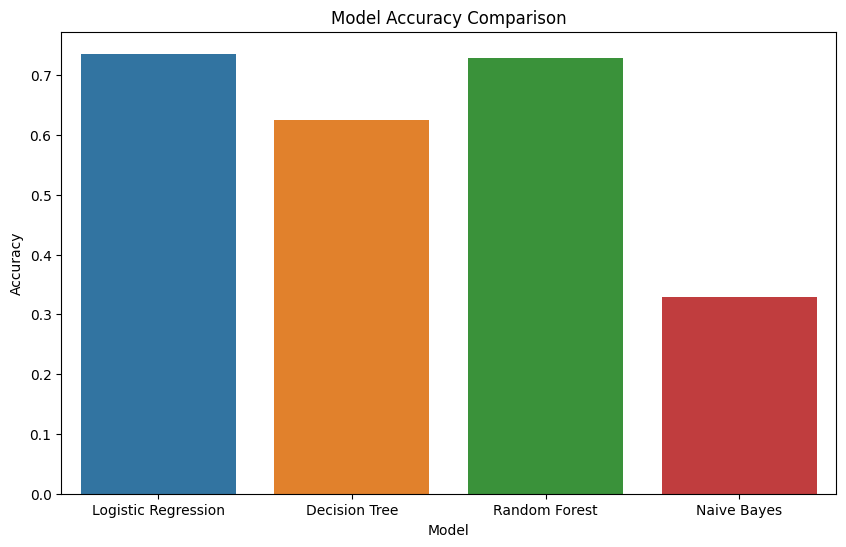

In [27]:
# Plot accuracy for each model
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

## Save the Best Model

In [28]:
# Function to save a trained model to a file
def save_model(model, filename):
    """Saves a trained model to a file.
    Args:
        model: The trained model object to save.
        filename: The path to the file where the model will be saved.
    """
    with open(filename, 'wb') as f:
        pickle.dump(model, f)  # Or joblib.dump(model, f) for Joblib

# Example: Save the Random Forest model
best_model = models["Random Forest"]
save_model(best_model, 'saved_model_Random_Forest.pkl')  # Or any other extension for Joblib


# What are the factors influencing user sentiment towards #ChatGPT, and how do these factors contribute to overall user satisfaction?

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = df[:10000]

# Data preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data['UserCreated'] = pd.to_datetime(data['UserCreated'])
data.fillna(0, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['User'] = label_encoder.fit_transform(data['User'])
data['Location'] = label_encoder.fit_transform(data['Location'].astype(str))

# Extract features and target
X = data[['User', 'UserVerified', 'UserFollowers', 'UserFriends', 'Retweets', 'Likes', 'Location']]
y = data['Sentiment']

# Text vectorization
# vectorizer = TfidfVectorizer(max_features=5000)
# X_text = vectorizer.fit_transform(data['Tweet']).toarray()

# Combine all features
# X = np.hstack((X, X_text))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

# Feature importance analysis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# # Plot feature importances
# plt.figure(figsize=(10, 8))
# sns.barplot(x=importances[indices], y=[f"Feature {i}" for i in indices])
# plt.title("Feature Importance")
# plt.show()


C:\Users\umang\AppData\Local\Temp\ipykernel_12180\3977201945.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])
C:\Users\umang\AppData\Local\Temp\ipykernel_12180\3977201945.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['UserCreated'] = pd.to_datetime(data['UserCreated'])
C:\Users\umang\AppData\Local\Temp\ipykernel_12180\3977201945.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a futur

              precision    recall  f1-score   support

    negative       0.74      0.93      0.82      1421
    positive       0.53      0.19      0.28       579

    accuracy                           0.72      2000
   macro avg       0.63      0.56      0.55      2000
weighted avg       0.68      0.72      0.67      2000

Accuracy: 0.717
Feature ranking:
1. Feature 0 (0.2541142213922507)
2. Feature 3 (0.22464278752152306)
3. Feature 2 (0.21832495640428412)
4. Feature 6 (0.18011565232003043)
5. Feature 5 (0.07707723479338474)
6. Feature 4 (0.04026234099469887)
7. Feature 1 (0.005462806573828126)


Feature ranking:
1. Feature Date (0.2541142213922507)
2. Feature User (0.22464278752152306)
3. Feature Url (0.21832495640428412)
4. Feature UserFollowers (0.18011565232003043)
5. Feature UserVerified (0.07707723479338474)
6. Feature UserCreated (0.04026234099469887)
7. Feature Tweet (0.005462806573828126)


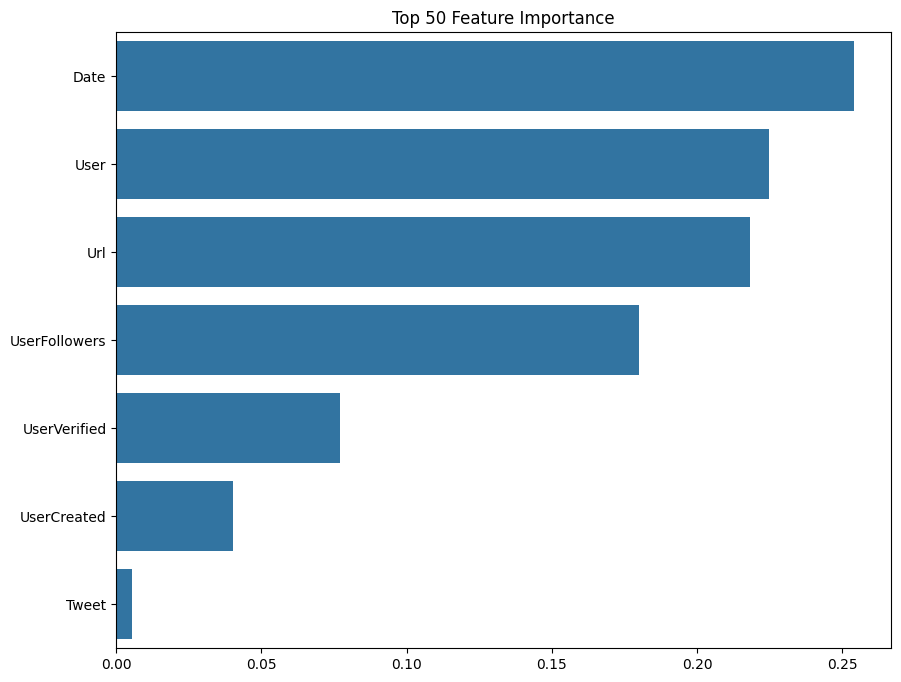

In [9]:
import shap

# Map feature indices to names
feature_names = list(data.columns)

# Feature importance analysis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(7):  # Limiting to top 50 features for brevity
    print(f"{f + 1}. Feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices][:50], y=[feature_names[i] for i in indices[:50]])
plt.title("Top 50 Feature Importance")
plt.show()



## 8. Conclusion

We have successfully trained and evaluated multiple models for sentiment analysis on tweet data. We visualized the performance of each model and saved the best-performing model for future use. The Random Forest model showed promising results and has been saved.
